In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\MASTER\Documents\curso_phyton\ecommerce\multinacional\E-commerce Dataset_mervemenekse.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [53]:
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [ ]:
# 
    

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [4]:
# hacer el eda de el df
df.info()
df.describe()
df.head()
df.tail()
df.shape
df.columns
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['Product_Category'].unique()
df['Product_Category'].value_counts()
df['Payment_method'].unique()
df['Payment_method'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

Payment_method
credit_card    38131
money_order     9628
e_wallet        2789
debit_card       733
not_defined        1
Name: count, dtype: int64

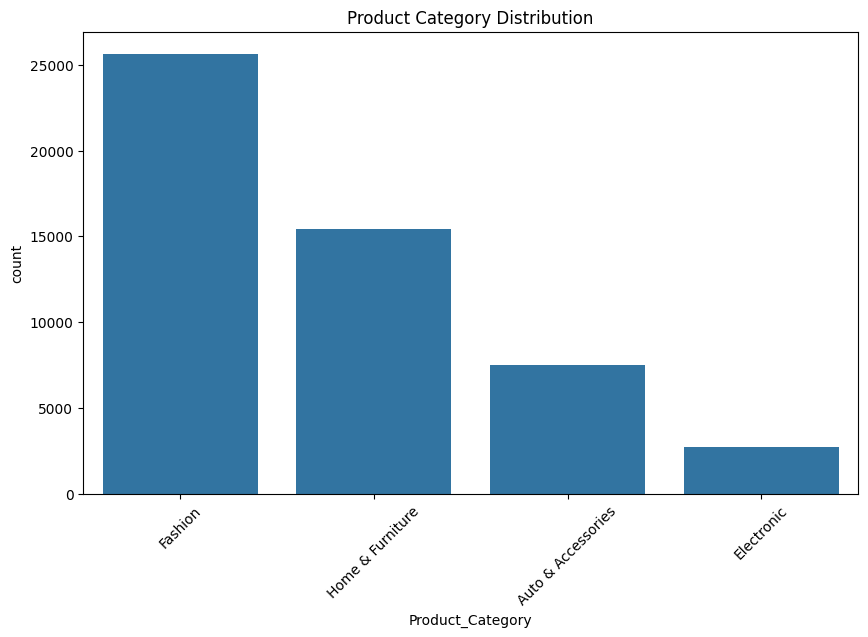

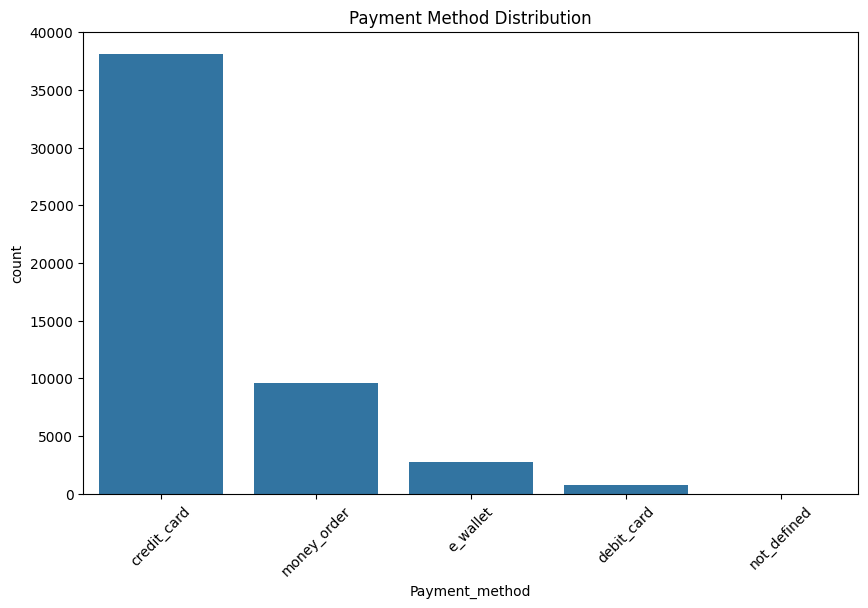

In [5]:
# Exploratory Data Analysis (EDA) of the dataset
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment_method', order=df['Payment_method'].value_counts().index)
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)
plt.show()

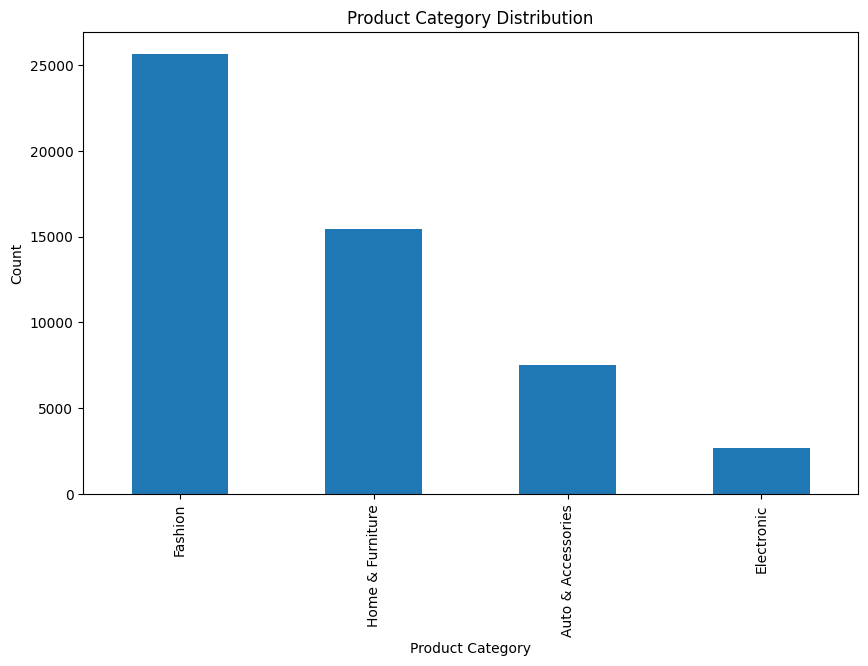

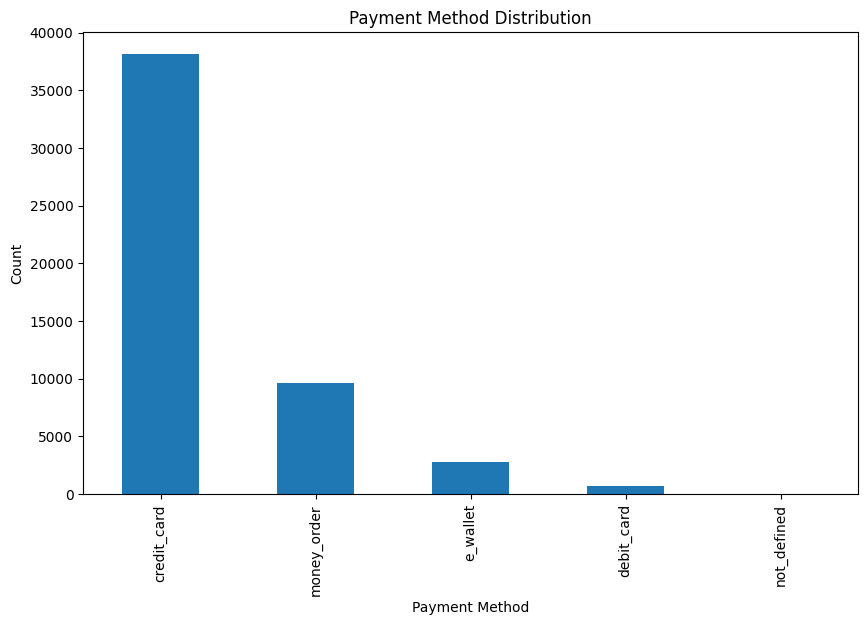

In [6]:
# realiza una exploracion de los datos
df['Product_Category'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()
df['Payment_method'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


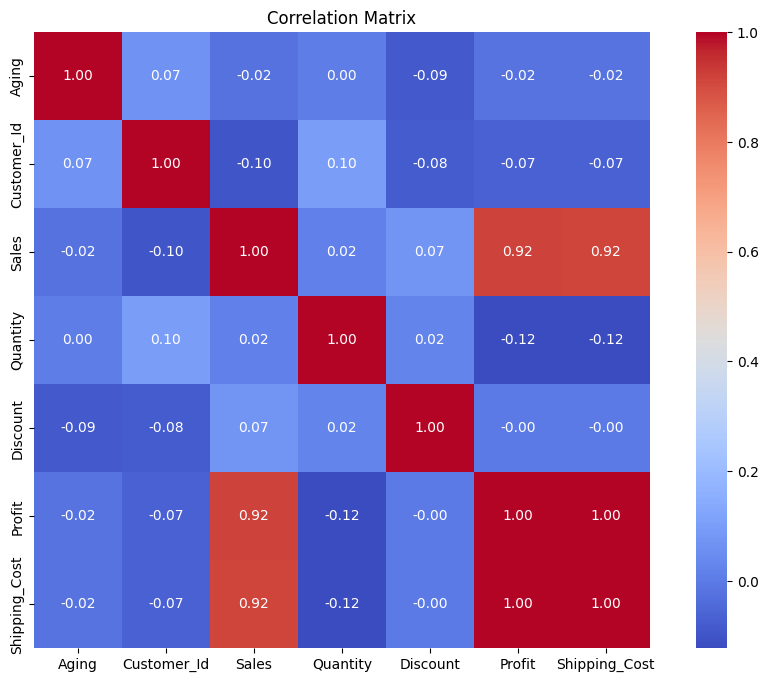

In [7]:
# realiza un analisis de correlacion
numerical_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

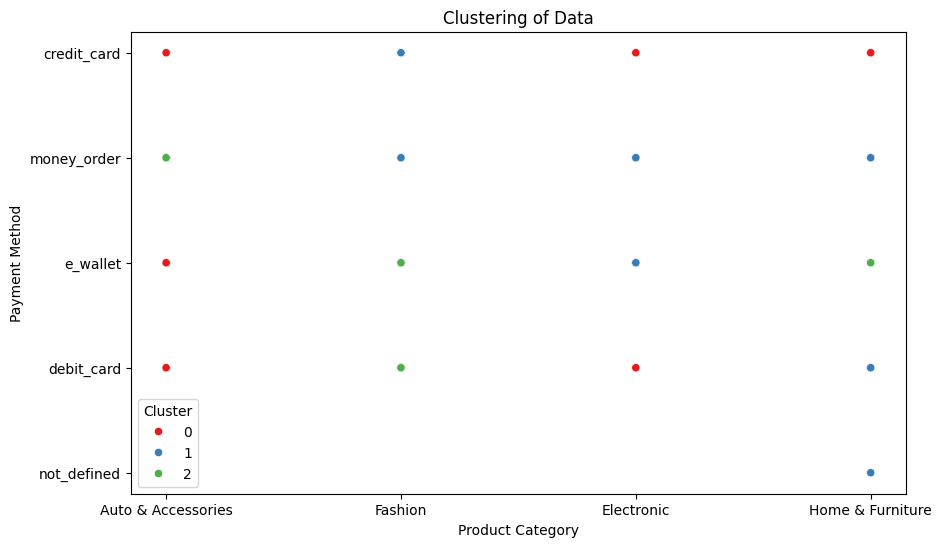

In [8]:
# haz un clustering de los datos
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
df['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Product_Category', y='Payment_method', hue='Cluster', palette='Set1')
plt.title('Clustering of Data')
plt.xlabel('Product Category')
plt.ylabel('Payment Method')
plt.legend(title='Cluster')
plt.show()

In [9]:
# hazme las metricas basicas de los clusters
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
davies_bouldin_avg = davies_bouldin_score(scaled_data, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {davies_bouldin_avg}')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)

Silhouette Score: 0.24975843144683516
Davies-Bouldin Score: 1.6930315185805405


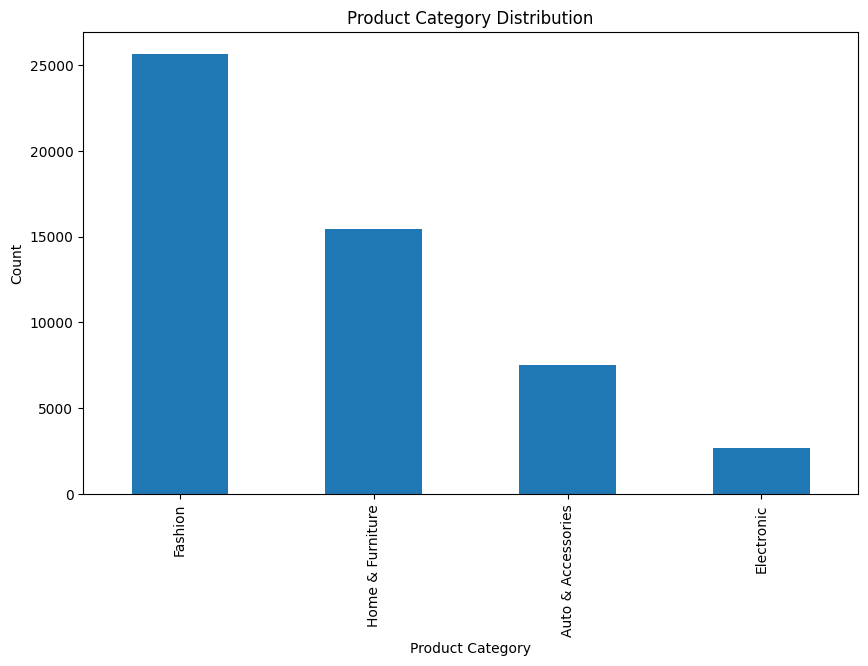

In [10]:
# Cualitative Individual Analysis
df = pd.read_csv(r'C:\Users\MASTER\Documents\curso_phyton\ecommerce\multinacional\E-commerce Dataset_mervemenekse.csv')
df['Product_Category'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

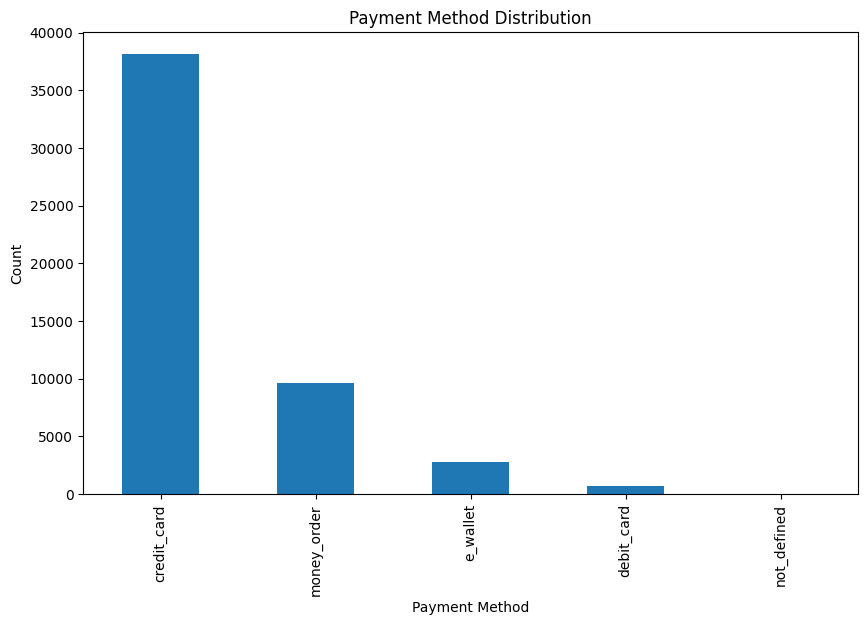

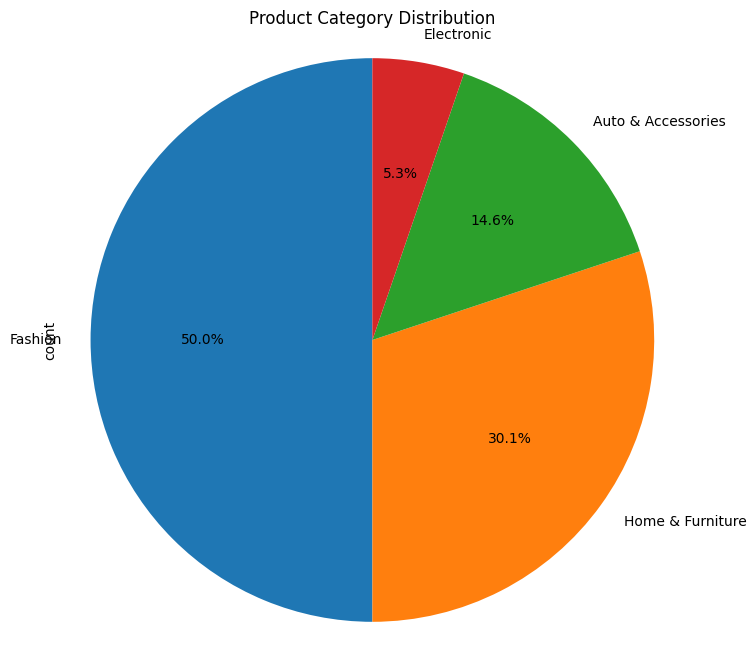

In [11]:
# Merge all graphics to Analyze market tendencies
df['Payment_method'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()
df['Product_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Product Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [12]:
df.info()
df.describe()
df.head()
df.tail()
df.shape
df.columns
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['Product_Category'].unique()
df['Product_Category'].value_counts()
df['Payment_method'].unique()
df['Payment_method'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

Payment_method
credit_card    38131
money_order     9628
e_wallet        2789
debit_card       733
not_defined        1
Name: count, dtype: int64

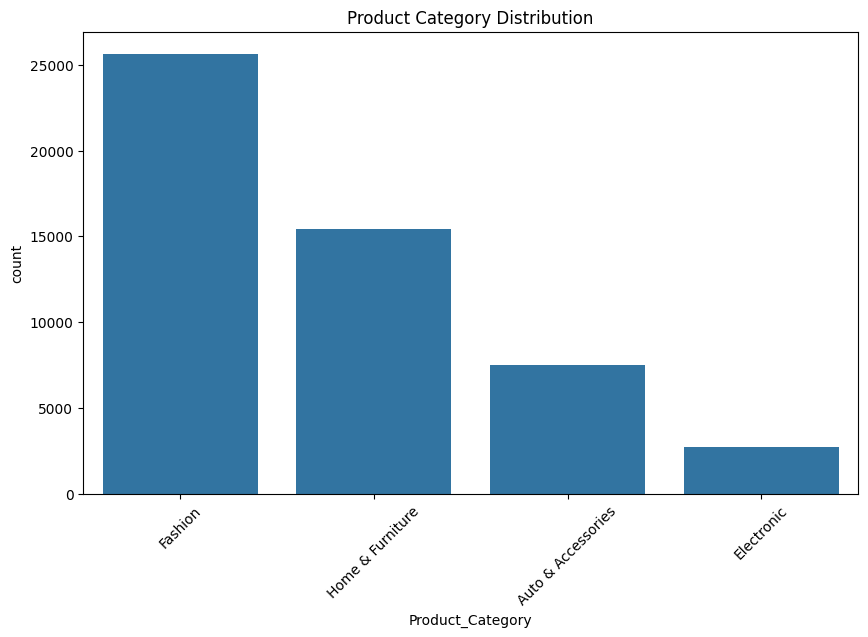

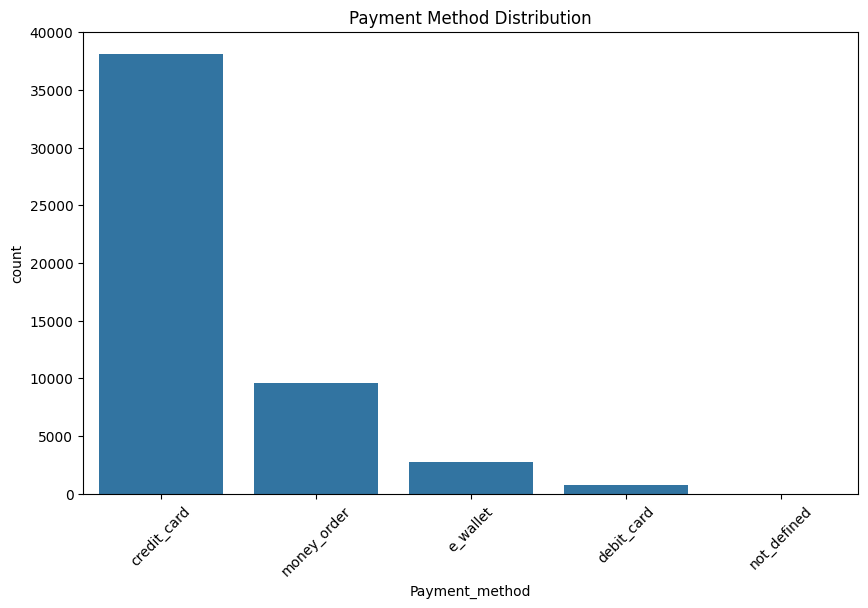

In [13]:
# muestrame las estadisticas de los datos y muestra en un grafico
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().index)
plt.title('Product Category Distribution')  
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='Payment_method', order=df['Payment_method'].value_counts().index)
plt.title('Payment Method Distribution')  
plt.xticks(rotation=45)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

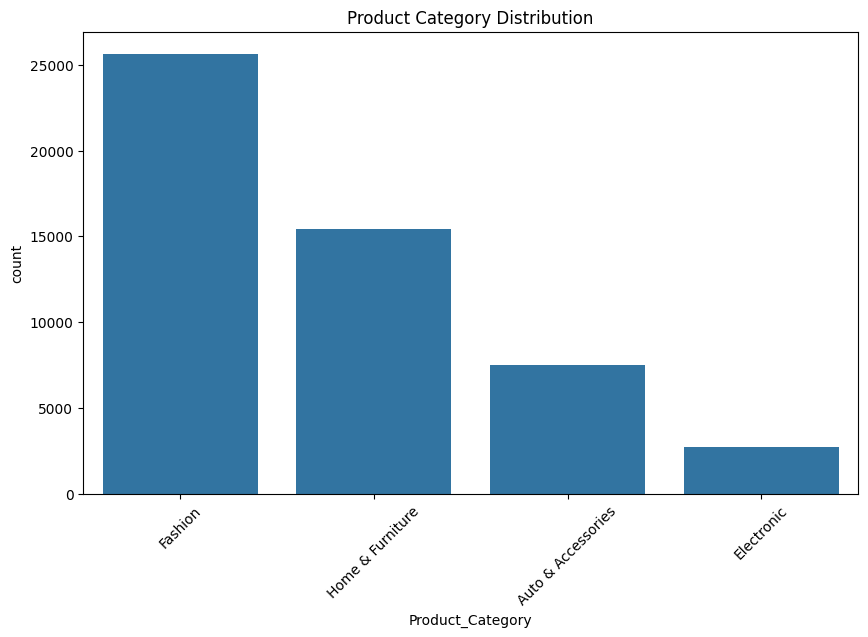

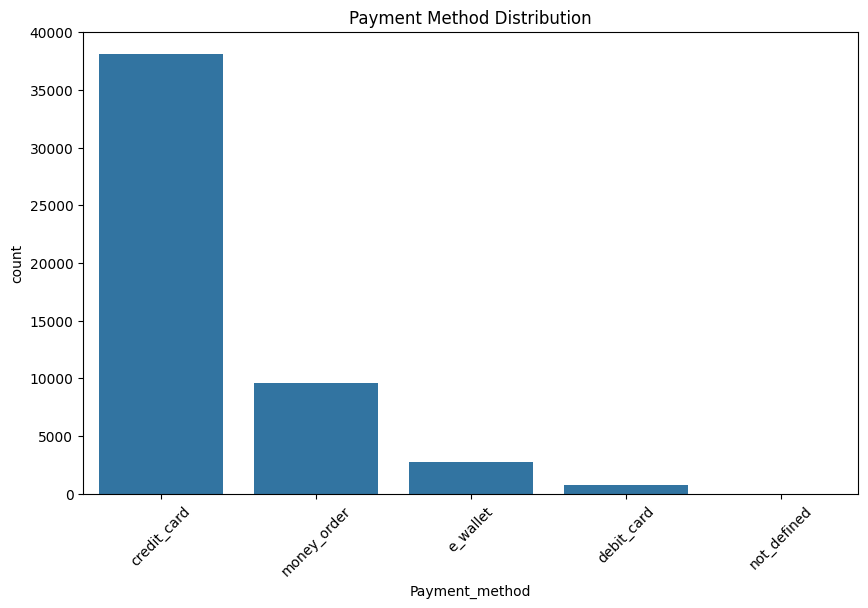

In [14]:
# análisis exploratorio de los datos de la multinacional
import pandas as pd
df = pd.read_csv(r'C:\Users\MASTER\Documents\curso_phyton\ecommerce\multinacional\E-commerce Dataset_mervemenekse.csv')
df.info()
df.describe()
df.head()
df.tail()
df.shape
df.columns
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['Product_Category'].unique()
df['Product_Category'].value_counts()
df['Payment_method'].unique()
df['Payment_method'].value_counts()
# Exploratory Data Analysis (EDA) of the dataset
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment_method', order=df['Payment_method'].value_counts().index)
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)
plt.show()

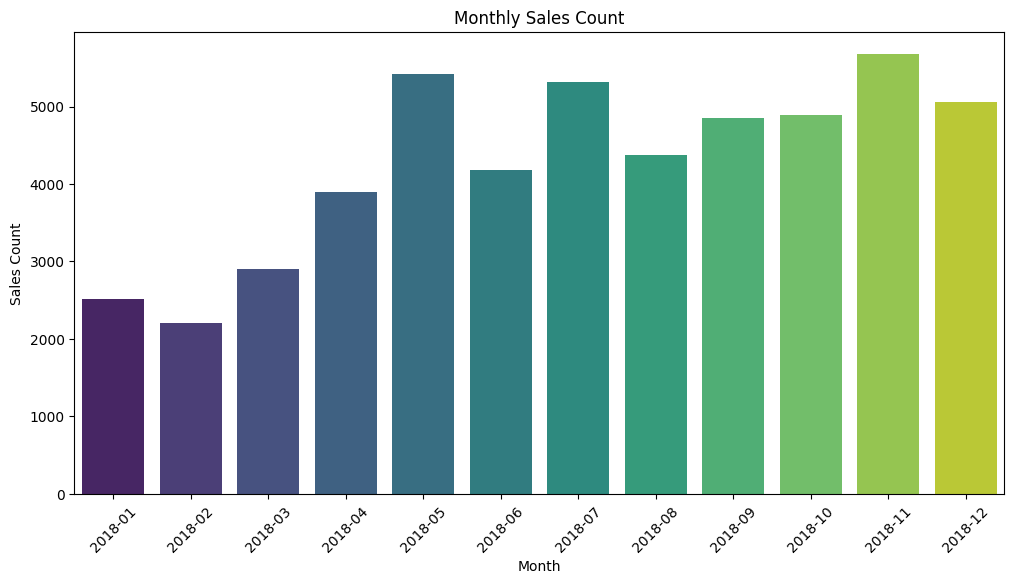

In [18]:
# muestrame las ventas por mes y muestra en un grafico y las cantidades de ventas por mes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
df['Order_Date'] = pd.to_datetime(df['Order_Date']) 
df['Month'] = df['Order_Date'].dt.to_period('M')
monthly_sales = df.groupby('Month').size().reset_index(name='Sales_Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='Month', y='Sales_Count', palette='viridis')
plt.title('Monthly Sales Count')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.show()

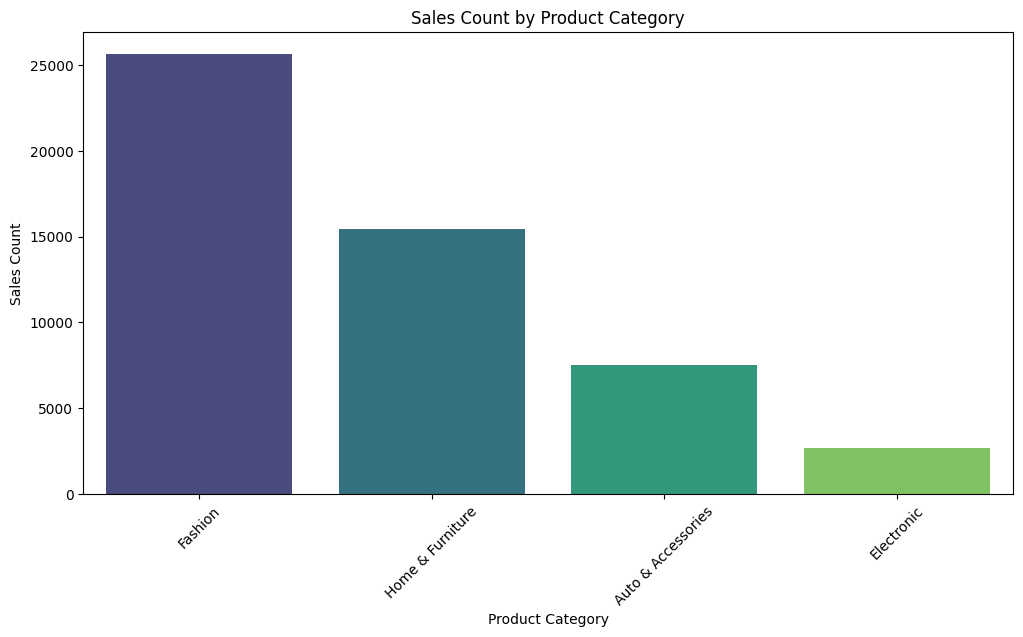

In [16]:
# muestrame las ventas mas relevantes por categoria y muestra en un grafico
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['Product_Category'] = df['Product_Category'].astype(str)  # Ensure the column is treated as categorical
category_sales = df['Product_Category'].value_counts().reset_index()
category_sales.columns = ['Product_Category', 'Sales_Count']
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='Product_Category', y='Sales_Count', palette='viridis')
plt.title('Sales Count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.show()

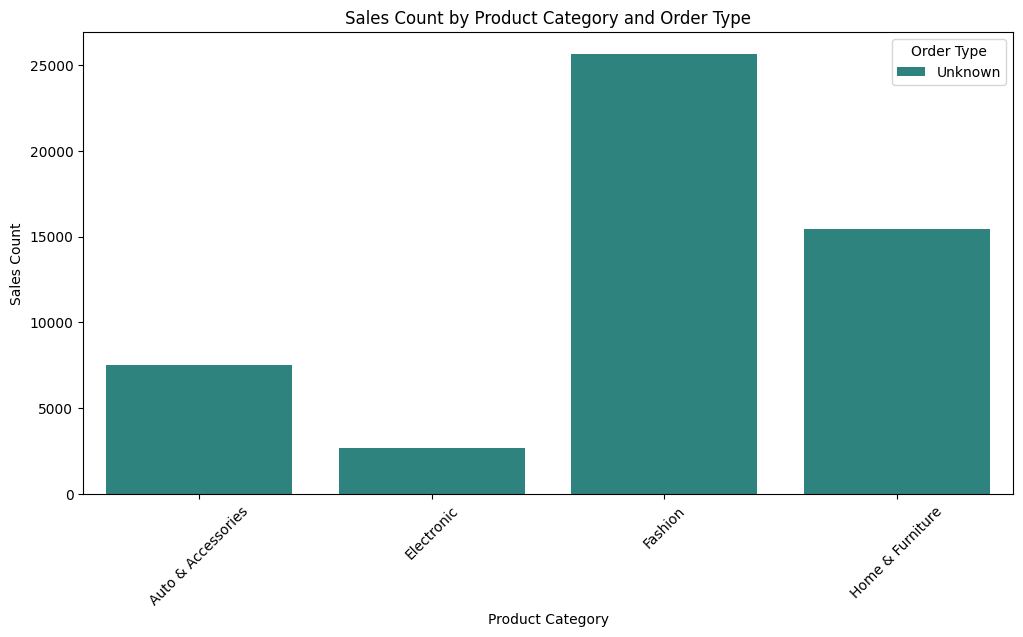

In [23]:
# muestra un resumen de las ventas mas relevantes con montos por categoria y tipo de orden
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure the column 'Order_Type' exists in the dataframe
if 'Order_Type' not in df.columns:
	df['Order_Type'] = 'Unknown'  # Assign a default value if the column does not exist
df['Order_Type'] = df['Order_Type'].astype(str)  # Ensure the column is treated as categorical
category_order_sales = df.groupby(['Product_Category', 'Order_Type']).size().reset_index(name='Sales_Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=category_order_sales, x='Product_Category', y='Sales_Count', hue='Order_Type', palette='viridis')
plt.title('Sales Count by Product Category and Order Type')
plt.xlabel('Product Category')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.legend(title='Order Type')
plt.show()

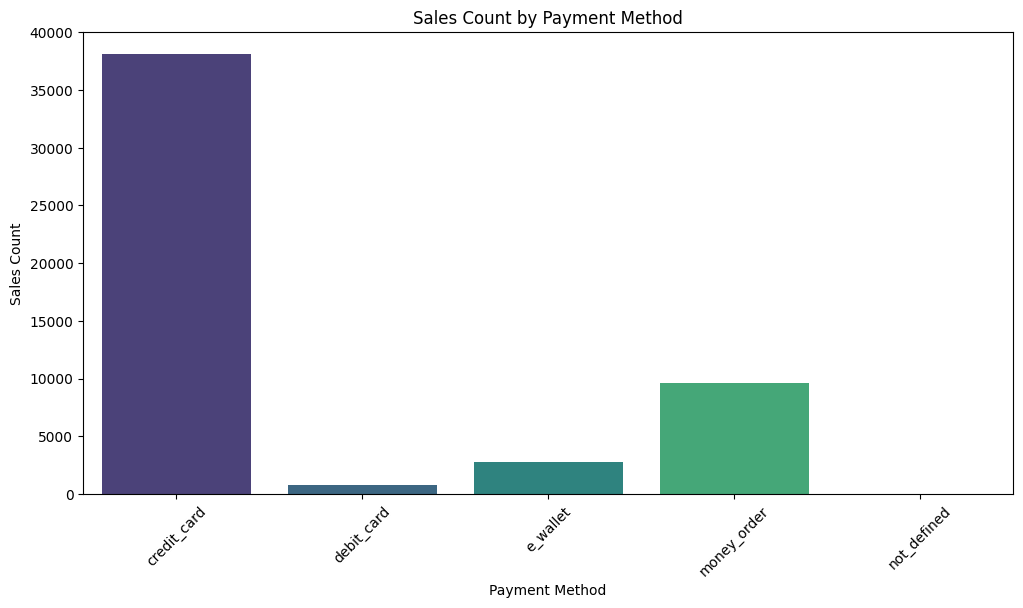

In [24]:
# dame un resumen de las ventas por metodo de pago y muestra en una tabla
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
payment_summary = df.groupby('Payment_method').size().reset_index(name='Sales_Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=payment_summary, x='Payment_method', y='Sales_Count', palette='viridis')
plt.title('Sales Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.show()

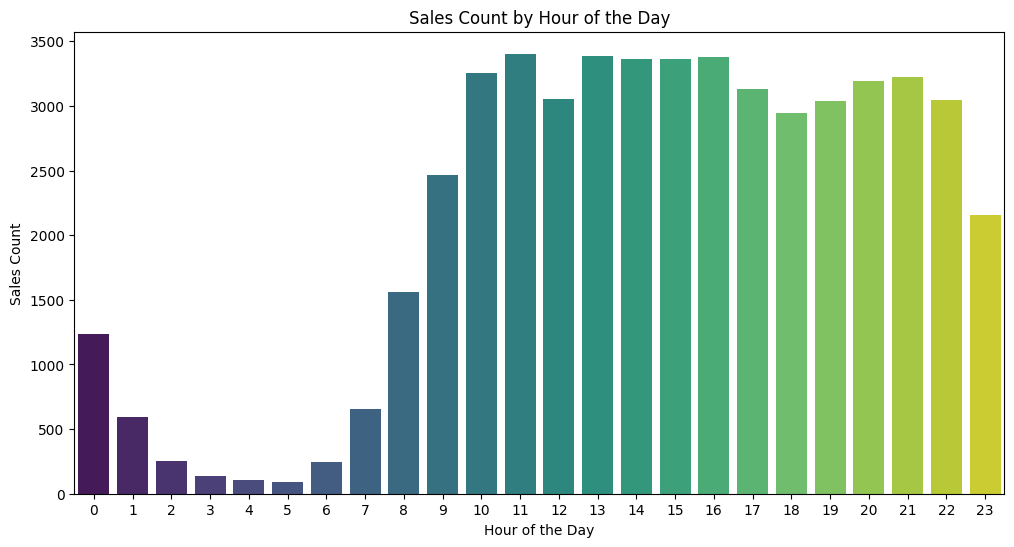

In [30]:
# quiero un resumen de las ventas en que horas fue mas relevantes y muestra en un grafico
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour  # Convert to hour
hourly_sales = df['Hour'].value_counts().sort_index().reset_index() 
hourly_sales.columns = ['Hour', 'Sales_Count']
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_sales, x='Hour', y='Sales_Count', palette='viridis')
plt.title('Sales Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Count')
plt.xticks(rotation=0)
plt.show()

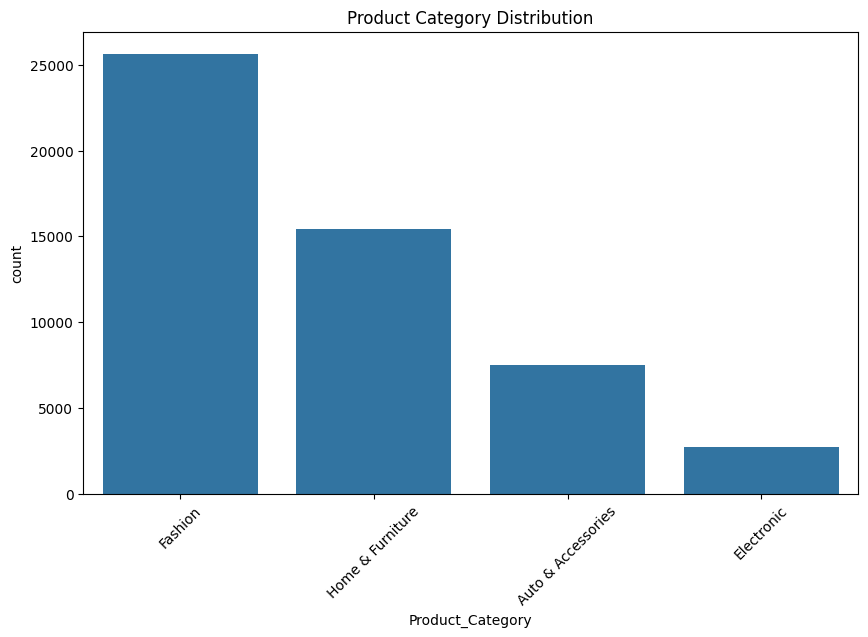

In [31]:
# realiza una exploracion de los datos y muestra en un grafico
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\MASTER\Documents\curso_phyton\ecommerce\multinacional\E-commerce Dataset_mervemenekse.csv')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

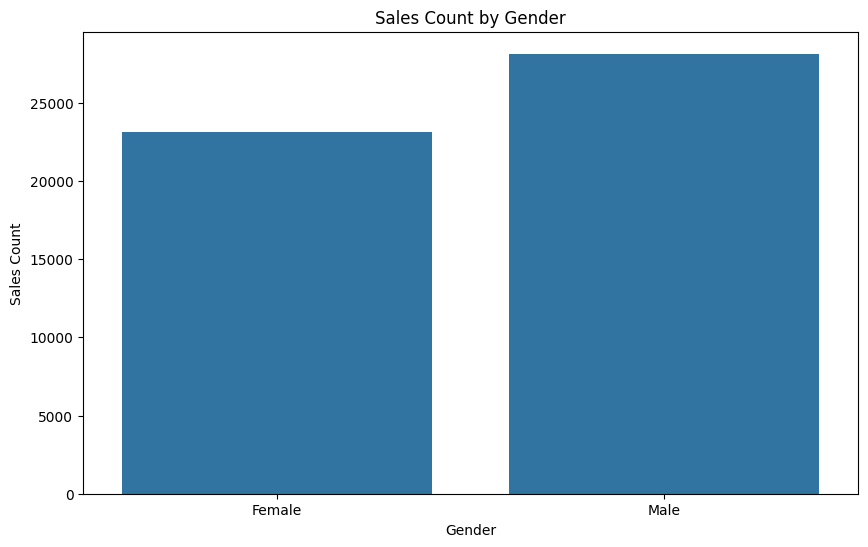

In [35]:
# muestrame las ventas por genero y muestra en un grafico
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\MASTER\Documents\curso_phyton\ecommerce\multinacional\E-commerce Dataset_mervemenekse.csv')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender')
plt.title('Sales Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Sales Count')
plt.xticks(rotation=0)
plt.show()

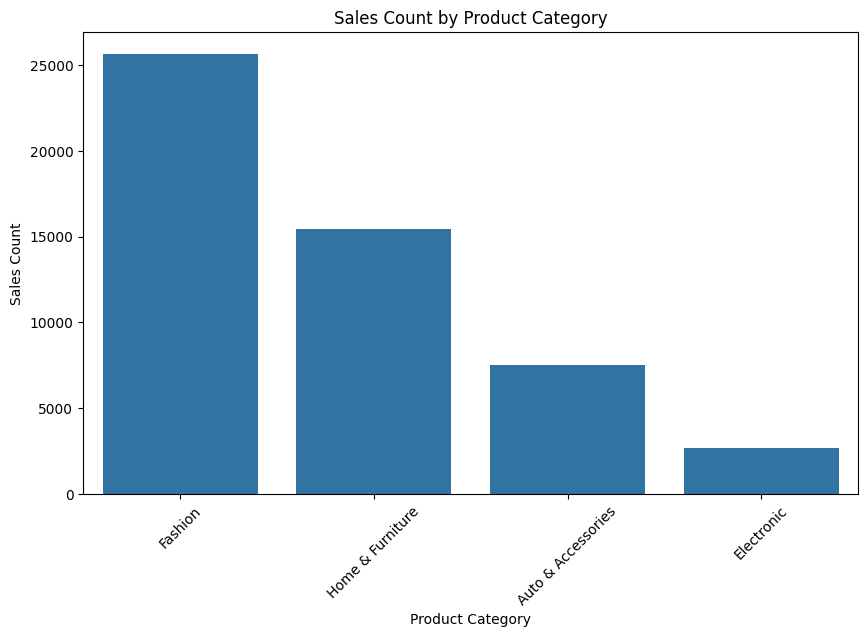

In [36]:
# muestrame las ventas por producto y muestra en un grafico
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\MASTER\Documents\curso_phyton\ecommerce\multinacional\E-commerce Dataset_mervemenekse.csv')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().index)
plt.title('Sales Count by Product Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Sales Count')
plt.show()

In [39]:
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [41]:
# muetrame la tabla productos y sus cantidades
import pandas as pd 
read_df = df = pd.read_csv(r'C:\Users\MASTER\Documents\curso_phyton\ecommerce\multinacional\E-commerce Dataset_mervemenekse.csv')
product_counts = read_df['Product_Category'].value_counts().reset_index()   
product_counts.columns = ['Product_Category', 'Count']
print(product_counts)
product_counts
product_counts.to_csv(r'C:\Users\MASTER\Documents\curso_phyton\ecommerce\multinacional\product_counts.csv', index=False)


     Product_Category  Count
0             Fashion  25646
1    Home & Furniture  15438
2  Auto & Accessories   7505
3          Electronic   2701


In [43]:
# hacer clustering de los datos
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Handle missing values by imputing them with the mean
imputer = SimpleImputer(strategy='mean')
numerical_data = read_df.select_dtypes(include=['float64', 'int64'])
numerical_data_imputed = imputer.fit_transform(numerical_data)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data_imputed)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
read_df['Cluster'] = kmeans.labels_
read_df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Cluster
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,2
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,0
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,1
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,2
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,0


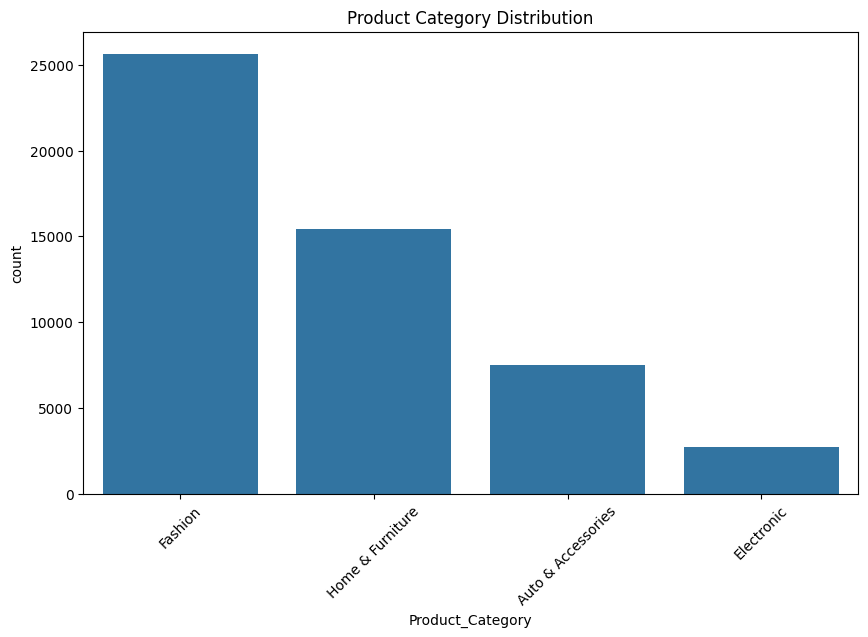

In [46]:
# muestrame cantidad de ventas de tyre
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = df
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.savefig(r'C:\Users\MASTER\Documents\curso_phyton\ecommerce\multinacional\product_category_distribution.png')    
plt.show()

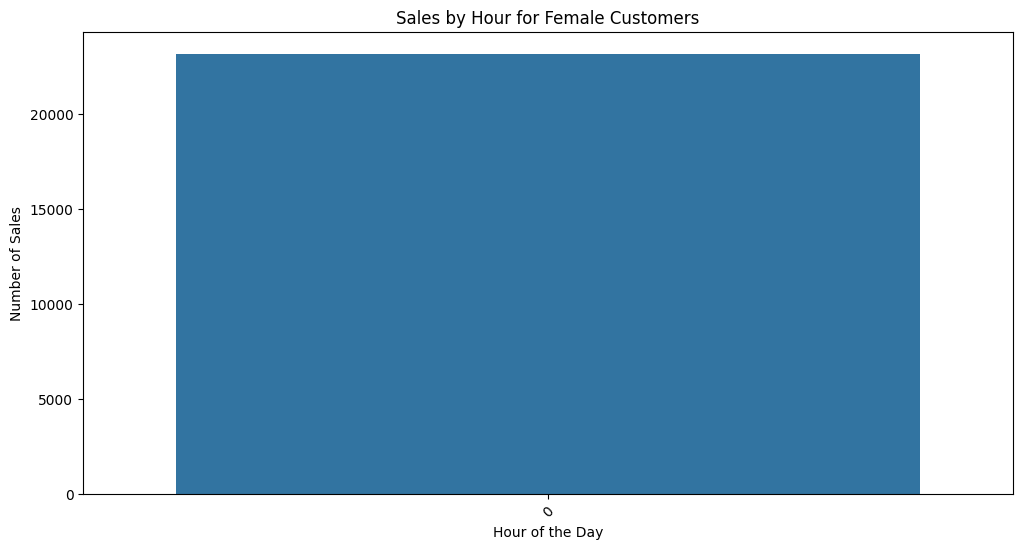

In [47]:
# muestrame las ventas por genero femenino y horas de las ventas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\MASTER\Documents\curso_phyton\ecommerce\multinacional\E-commerce Dataset_mervemenekse.csv')
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Hour'] = df['Order_Date'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Gender'] == 'Female'], x='Hour')
plt.title('Sales by Hour for Female Customers')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [50]:
# muestrame los valores unicos de la columna Product
unique_products = df['Product_Category'].unique()
print(unique_products)

['Auto & Accessories' 'Fashion' 'Electronic' 'Home & Furniture']


In [61]:
# crear un readme
read_df = df = pd.read_csv(r'C:\Users\MASTER\Documents\curso_phyton\ecommerce\multinacional\E-commerce Dataset_mervemenekse.csv')
read_df.info()
read_df.describe()
read_df.head()
read_df.tail()
read_df.shape
read_df.columns
read_df.isnull().sum()
read_df.duplicated().sum()
read_df.drop_duplicates(inplace=True)
read_df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 